### Regression Problem: Predicting House Prices  

In [1]:
#dependencies 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
#read data 

Data = pd.read_csv('kc_house_data.csv')
Data.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

#### Preprocessing the Data

In [3]:
#Eliminate unnecessary features

da = Data.drop(['id'],axis=1)
conv_dates = [1 if values == 2014 else 0 for values in da.date] #date is converted into 0s and 1s
da['date'] = conv_dates
da['bathrooms'] = da['bathrooms'].astype(int)
da['floors'] = da['floors'].astype(int)
da.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     0  221900.0         3          1         1180      5650       1   
1     0  538000.0         3          2         2570      7242       2   
2     0  180000.0         2          1          770     10000       1   
3     0  604000.0         4          3         1960      5000       1   
4     0  510000.0         3          2         1680      8080       1   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

#### Plotting a Scatter plot for all columns to find relevant features 

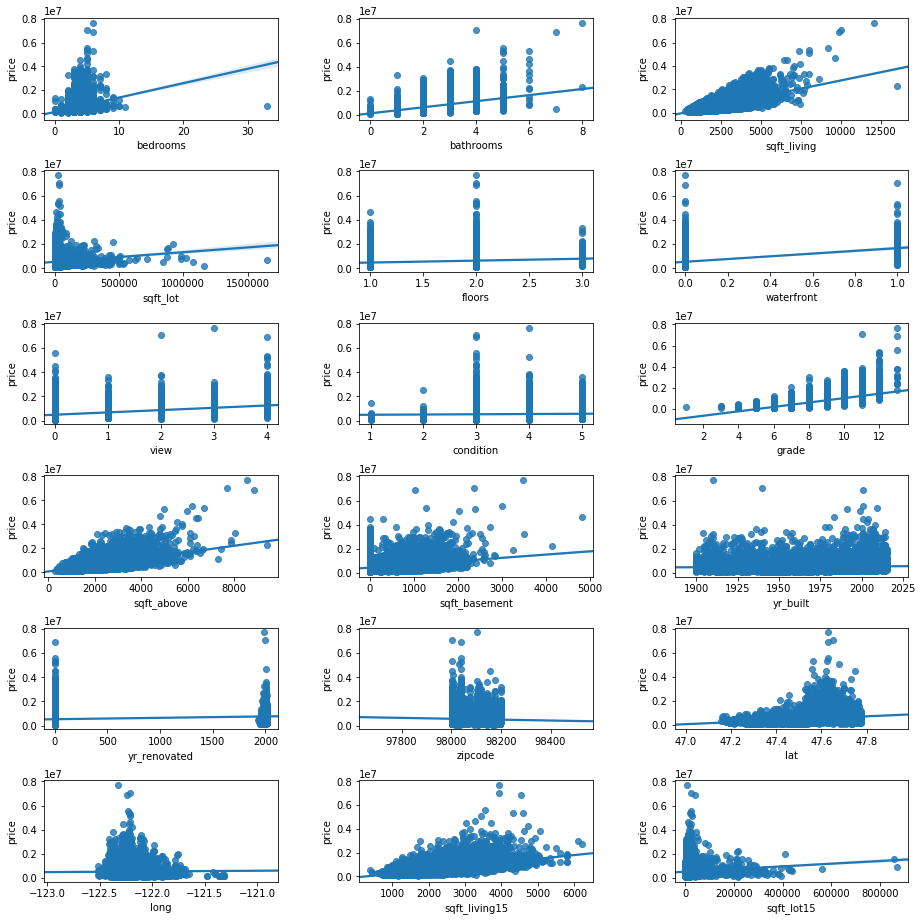

In [5]:
col = da.drop(['price','date'],axis =1).columns

for i in range(len(col)):
    plt.subplot(6,3,i+1)
    sns.regplot(da[col[i]],da['price'])
plt.subplots_adjust(top=3, bottom=0, left=0, right=2, hspace=0.5,
                    wspace=0.35)
    

In [6]:
da.isnull().values.sum()
#no missing values detected 

0

####  Splitting Data into Test and Train sets

In [7]:
from sklearn.model_selection import train_test_split
x = da.drop(['price'],axis=1).values
y = da['price'].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


#### Applying Regression Models and Predicting House Prices 

In [8]:
#Linear Regression Model 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)


In [9]:
from sklearn.metrics import r2_score 
print("The Accuracy of Linear Regression Model is:", r2_score(y_test,pred)*100, "%")

The Accuracy of Linear Regression Model is: 69.64693580169549 %


In [10]:
#Gradient Boosting Regression Model

from sklearn.ensemble import GradientBoostingRegressor 
reg=GradientBoostingRegressor(n_estimators=600,min_samples_split=2,max_depth=5,loss='ls')

In [11]:
reg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
pred = reg.predict(x_test)

In [13]:
from sklearn.metrics import r2_score 
print("The Accuracy of Gradient Boosting Regression Model is:", r2_score(y_test,pred)*100, "%")

The Accuracy of Gradient Boosting Regression Model is: 90.61154795301185 %


#### Better Accuracy is achieved by using Gradient Boosting Regression Model, but the time taken to fit the data is longer.